In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 
import numpy as np
import GenerateData as gd

In [2]:
# !dolfin-convert data/mesh_test/RandomMesh_0.msh data/mesh_test/RandomMesh_0.xml

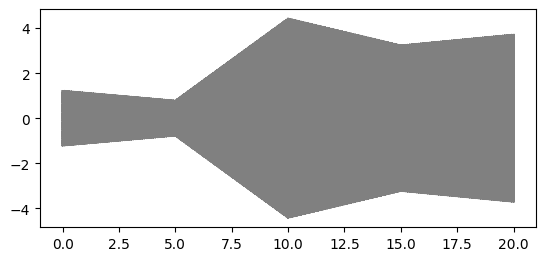

In [3]:
mesh_load = gd.MeshLoader("data/mesh01/RandomMesh_1")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [4]:
tags = {'walls': [1], 'inlet':[2], 'outlet': [3], 'interface': [4,5,6], 'faces': [7,8,9,10]}
# tags = {'walls':[1],'inlet':[2],'outlet':[3], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f8b877ceef0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f8b877ceef0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f8b8760dcf0>))

Solving linear variational problem.


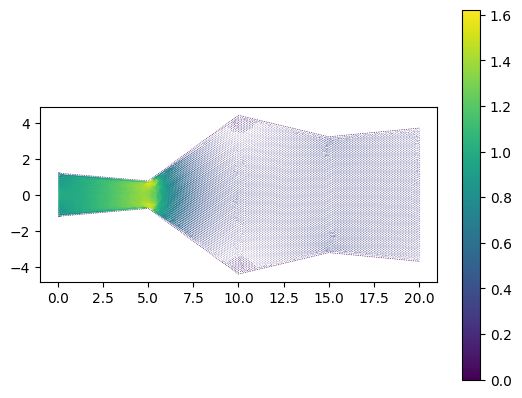

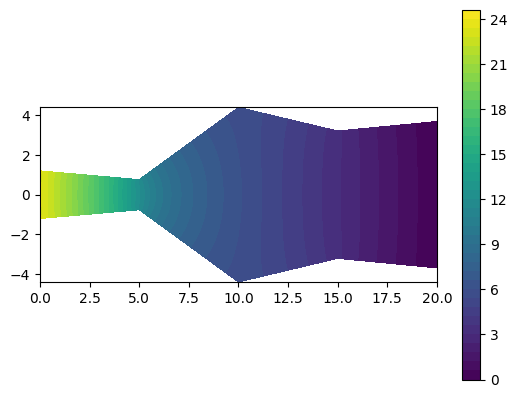

Solving linear variational problem.


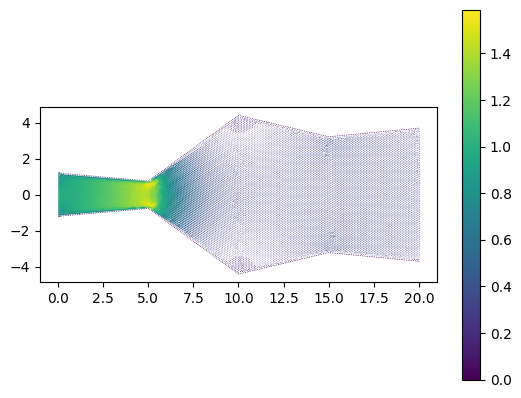

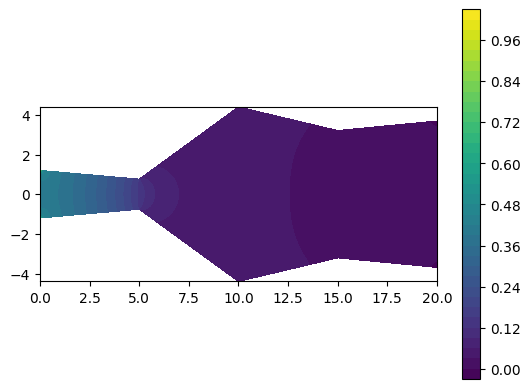

Solving linear variational problem.


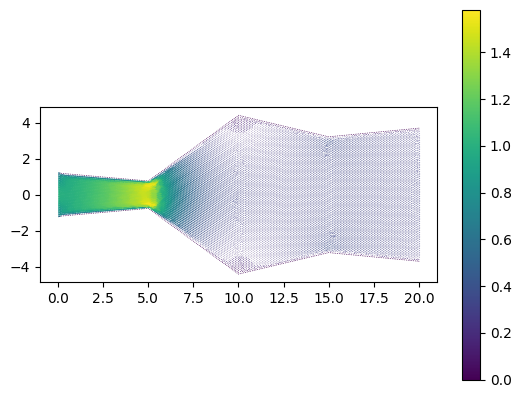

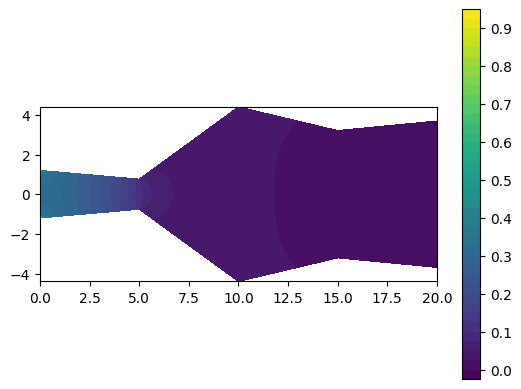

Solving linear variational problem.


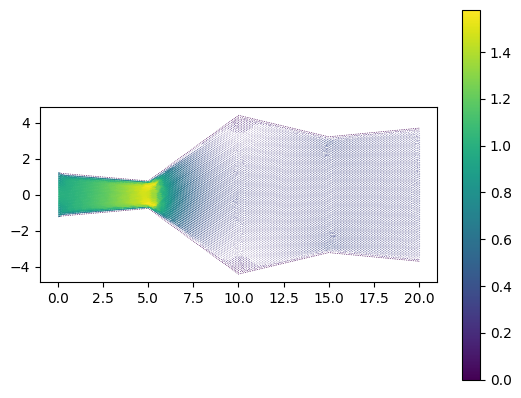

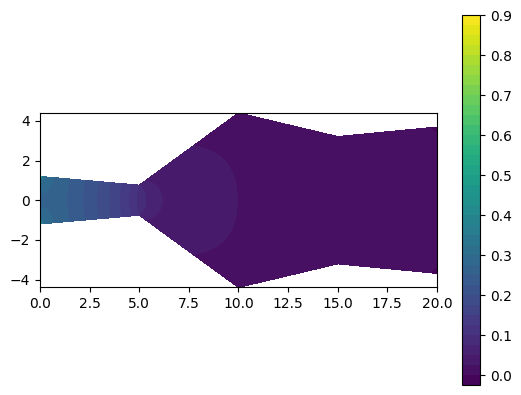

In [6]:
V = VectorElement("P", mesh_load.mesh.ufl_cell(), 2)
Q = FiniteElement("P", mesh_load.mesh.ufl_cell(), 1)
rho = 1*1e3
mu = 4*1e-6
U0 = 0.001
L0 = 0.001
inflow = Expression(("(-1.0/4.0*x[1]*x[1] + 1)", " 0.0 "), degree=2)
dt = 0.5
T = 2
f = Constant((0.0, 0.0))

ns = gd.Stokes(mesh_load, V, Q, rho, mu, U0, L0, inflow, f, dt, T, doplot=True)
ns.solve()

# ns.plot_solution()

In [7]:
data = gd.DataNS(ns, mesh_load)
data.nodes_data()
data.save_graph(output_dir = "data/graphs_test_NS/")

['flow_rate', 'pressure']
Graph saved to disk.


Graph(num_nodes=5, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32), 'k': Scheme(shape=(1, 1), dtype=torch.float32), 'NodeId': Scheme(shape=(), dtype=torch.float32), 'inlet_mask': Scheme(shape=(), dtype=torch.float32), 'outlet_mask': Scheme(shape=(), dtype=torch.float32), 'interface_length': Scheme(shape=(1, 1), dtype=torch.float32), 'flow_rate': Scheme(shape=(1, 4), dtype=torch.float32), 'dt': Scheme(shape=(1, 1), dtype=torch.float32), 'T': Scheme(shape=(1, 1), dtype=torch.float32), 'pressure': Scheme(shape=(1, 4), dtype=torch.float32)}
      edata_schemes={'EdgeId': Scheme(shape=(), dtype=torch.float32), 'area': Scheme(shape=(1, 1), dtype=torch.float32), 'length': Scheme(shape=(1, 1), dtype=torch.float32)})

In [8]:
import dgl

bo = dgl.data.utils.load_graphs(f"data/graphs_test_NS/k_{250.0}.grph")
bo[0][0].ndata

{'pressure': tensor([[[2.3511e+01, 4.4223e-01, 3.5169e-01, 3.0377e-01]],

        [[1.1960e+01, 1.3658e-01, 1.0632e-01, 9.0226e-02]],

        [[5.9630e+00, 3.6889e-02, 2.8329e-02, 2.3788e-02]],

        [[3.1103e+00, 2.0605e-02, 1.5829e-02, 1.3296e-02]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]]), 'T': tensor([[[1.5000]],

        [[1.5000]],

        [[1.5000]],

        [[1.5000]],

        [[1.5000]]]), 'flow_rate': tensor([[[2.1120, 2.1120, 2.1120, 2.1120]],

        [[2.0823, 2.0947, 2.0981, 2.0996]],

        [[2.1106, 2.1103, 2.1103, 2.1102]],

        [[2.1066, 2.1085, 2.1090, 2.1091]],

        [[2.1108, 2.1105, 2.1104, 2.1104]]]), 'interface_length': tensor([[[2.4000]],

        [[1.5200]],

        [[8.8000]],

        [[6.4200]],

        [[7.3800]]]), 'outlet_mask': tensor([0., 0., 0., 0., 1.]), 'dt': tensor([[[0.5000]],

        [[0.5000]],

        [[0.5000]],

        [[0.5000]],

        [[0.5000]]]), 'inlet_mask': tensor([1., 0., 0., 0., 0.]), 'Nod

In [ ]:
self.V = VectorElement("P", self.mesh.mesh.ufl_cell(), 2)
self.Q = FiniteElement("P", self.mesh.mesh.ufl_cell(), 1)
self.rho = 1*1e3
self.mu = 4*1e-6
self.U0 = 0.001
self.L0 = 0.001
self.inflow = Expression(("(-1.0/4.0*x[1]*x[1] + 1)", " 0.0 "), degree=2)
self.dt = 0.5
self.T = 10
self.f = Constant((0.0, 0.0))

In [ ]:
data = gd.DataNS(ns,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

TypeError: DataNS.flux() missing 1 required positional argument: 'u'

In [ ]:
center_line = []
tags_list = ['inlet','interface','outlet']
for j in tags_list:
    for i in tags[j]:
        edge_coord =[]
        for edge in edges(mesh):
            if bounds.array()[edge.index()] == i:
                for vertex in vertices(edge):
                    coordinate = vertex.point().array()
                    edge_coord.append(coordinate)

        edge_coord = np.array(edge_coord)
        center_line.append([(np.max(edge_coord[:,0])+np.min(edge_coord[:,0]))/2,(np.max(edge_coord[:,1])+np.min(edge_coord[:,1]))/2])

print(center_line)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed